In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("credit1.csv")

In [4]:
df.head()

,index,transaction_id,customer_id,credit_card_number,amount,transaction_type,old_balance,transaction_time,new_balance,is_fraud
0,1,T00001,C1097,4.528410e+16,1439.73,Online,3996.99,01-01-2023 00:00,2557.26,0
1,2,T00002,C1067,4.235880e+16,4015.18,Transfer,4787.01,01-01-2023 01:00,771.83,0
2,3,T00003,C1076,4.155730e+16,4986.22,Online,8560.02,01-01-2023 02:00,3573.80,0
3,4,T00004,C1036,4.193230e+16,159.83,POS,3466.04,01-01-2023 03:00,3306.21,0
4,5,T00005,C1012,4.909860e+16,4487.86,Online,8709.53,01-01-2023 04:00,4221.67,0


In [5]:
df.tail()

,index,transaction_id,customer_id,credit_card_number,amount,transaction_type,old_balance,transaction_time,new_balance,is_fraud
995,996,T00996,C1057,4.634850e+16,3054.44,Transfer,6875.91,11-02-2023 11:00,3821.47,0
996,997,T00997,C1073,4.276130e+16,2446.01,ATM,5081.88,11-02-2023 12:00,2635.87,0
997,998,T00998,C1083,4.196350e+16,674.58,POS,7674.97,11-02-2023 13:00,7000.39,0
998,999,T00999,C1024,4.374410e+16,1314.05,POS,4904.38,11-02-2023 14:00,3590.33,0
999,1000,T01000,C1041,4.954620e+16,2101.31,Online,1578.88,11-02-2023 15:00,-522.43,0


In [6]:
df1=pd.read_csv(r"fraud.csv")

In [7]:
df1.head()

,a,transaction_id,customer_id,credit_card_number,amount,transaction_type,old_balance,transaction_time,new_balance,is_fraud
0,1,T00001,C3619,4.579430e+16,3751.66,ATM,25033.55,01-01-2023 00:00,21281.89,0
1,2,T00002,C1456,4.796060e+16,9507.64,Transfer,37362.66,01-01-2023 00:01,27855.02,0
2,3,T00003,C1102,4.704490e+16,7322.62,Transfer,28177.07,01-01-2023 00:02,20854.45,0
3,4,T00004,C4037,4.345580e+16,5990.60,POS,4256.80,01-01-2023 00:03,-1733.80,1
4,5,T00005,C2126,4.241860e+16,1568.63,Online,9360.45,01-01-2023 00:04,7791.82,0


In [8]:
df1.tail()

,a,transaction_id,customer_id,credit_card_number,amount,transaction_type,old_balance,transaction_time,new_balance,is_fraud
9995,9996,T09996,C1859,4.142960e+16,8577.98,POS,16441.60,07-01-2023 22:35,7863.62,0
9996,9997,T09997,C2314,4.244990e+16,8976.11,POS,36375.62,07-01-2023 22:36,27399.51,0
9997,9998,T09998,C1821,4.729860e+16,9467.61,POS,46171.38,07-01-2023 22:37,36703.77,0
9998,9999,T09999,C1788,4.642050e+16,3980.91,Transfer,31900.55,07-01-2023 22:38,27919.64,1
9999,10000,T10000,C2173,4.792760e+16,2179.23,ATM,47596.74,07-01-2023 22:39,45417.51,0


In [9]:
df1.describe

<bound method NDFrame.describe of           a transaction_id customer_id  credit_card_number   amount  \
0         1         T00001       C3619        4.579430e+16  3751.66   
1         2         T00002       C1456        4.796060e+16  9507.64   
2         3         T00003       C1102        4.704490e+16  7322.62   
3         4         T00004       C4037        4.345580e+16  5990.60   
4         5         T00005       C2126        4.241860e+16  1568.63   
...     ...            ...         ...                 ...      ...   
9995   9996         T09996       C1859        4.142960e+16  8577.98   
9996   9997         T09997       C2314        4.244990e+16  8976.11   
9997   9998         T09998       C1821        4.729860e+16  9467.61   
9998   9999         T09999       C1788        4.642050e+16  3980.91   
9999  10000         T10000       C2173        4.792760e+16  2179.23   

     transaction_type  old_balance  transaction_time  new_balance  is_fraud  
0                 ATM     25033.55 

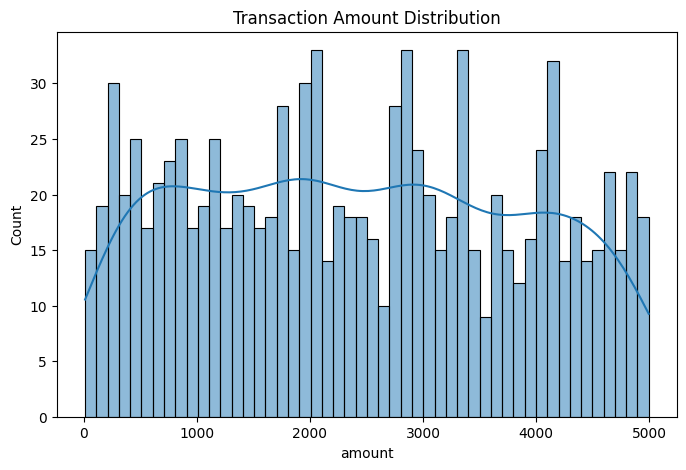

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["amount"],bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

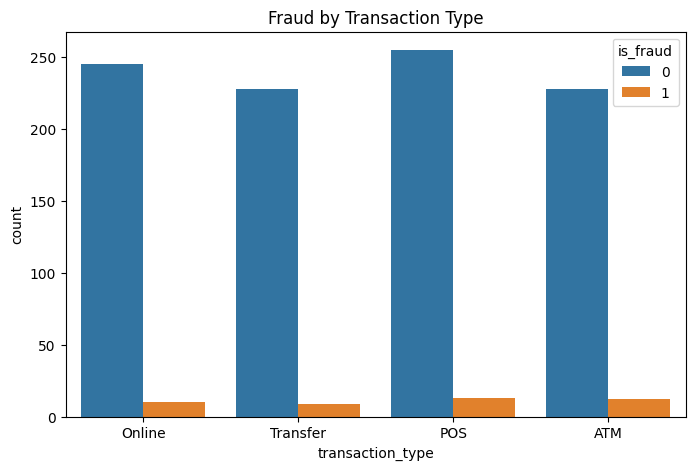

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x="transaction_type", hue="is_fraud", data=df)
plt.title("Fraud by Transaction Type")
plt.show()


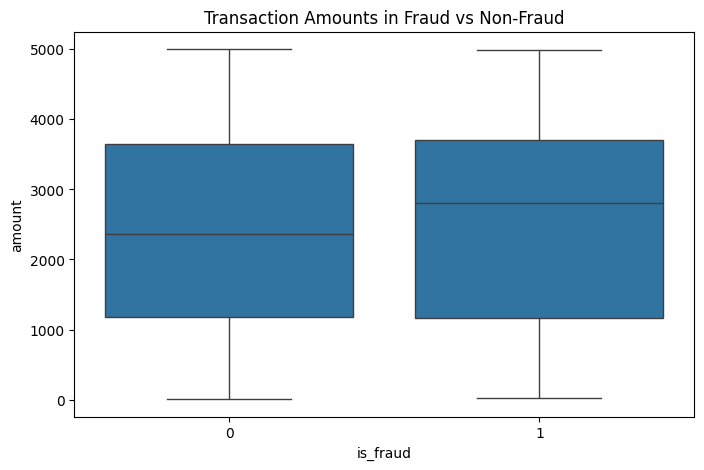

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x="is_fraud", y="amount", data=df)
plt.title("Transaction Amounts in Fraud vs Non-Fraud")
plt.show()


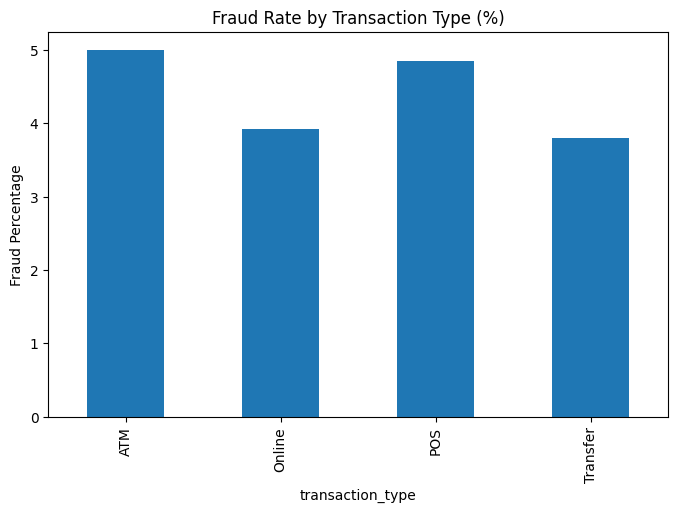

In [17]:
fraud_rate = df.groupby("transaction_type")["is_fraud"].mean() * 100

fraud_rate.plot(kind="bar", figsize=(8,5))
plt.title("Fraud Rate by Transaction Type (%)")
plt.ylabel("Fraud Percentage")
plt.show()


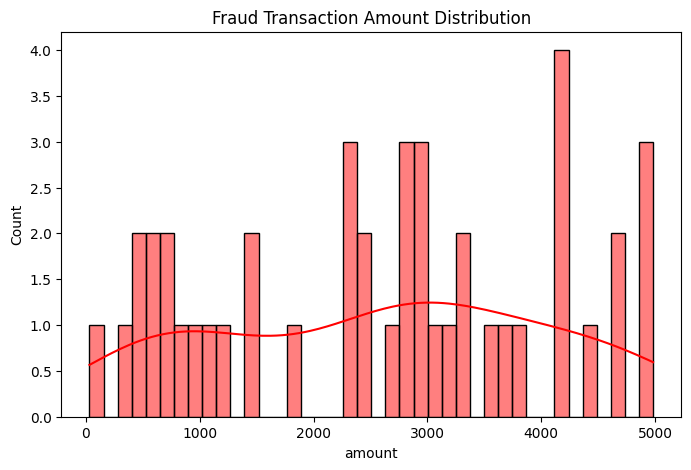

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["is_fraud"]==1]["amount"], bins=40, kde=True, color="red")
plt.title("Fraud Transaction Amount Distribution")
plt.show()


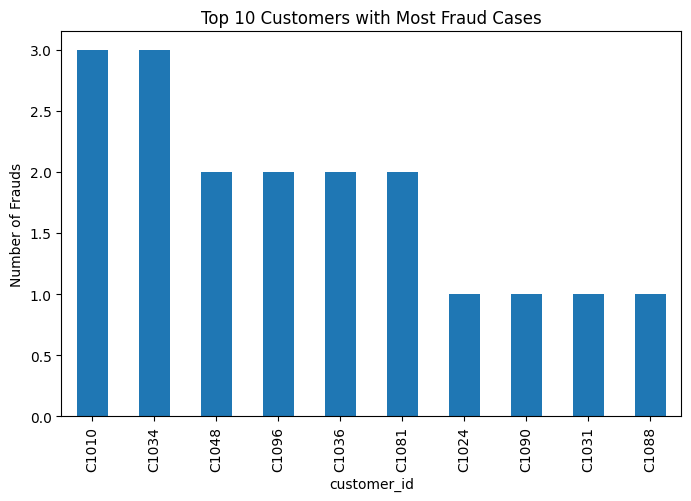

In [19]:
top_fraud_customers = df[df["is_fraud"]==1]["customer_id"].value_counts().head(10)

top_fraud_customers.plot(kind="bar", figsize=(8,5))
plt.title("Top 10 Customers with Most Fraud Cases")
plt.ylabel("Number of Frauds")
plt.show()


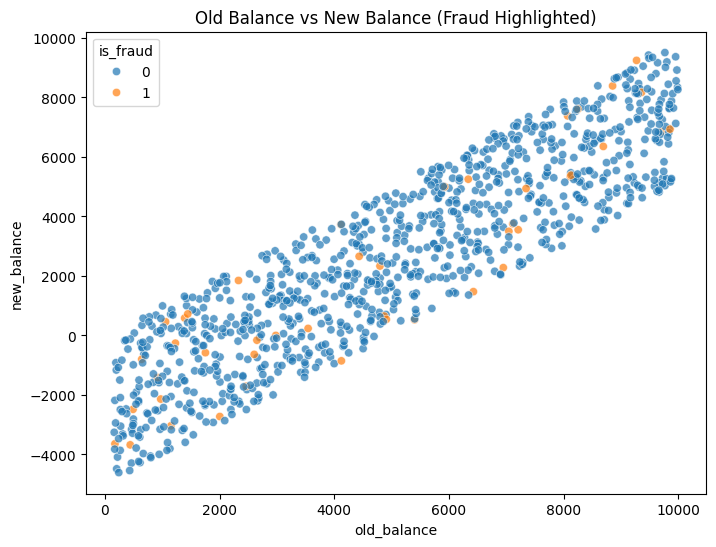

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="old_balance", y="new_balance", hue="is_fraud", data=df, alpha=0.7)
plt.title("Old Balance vs New Balance (Fraud Highlighted)")
plt.show()


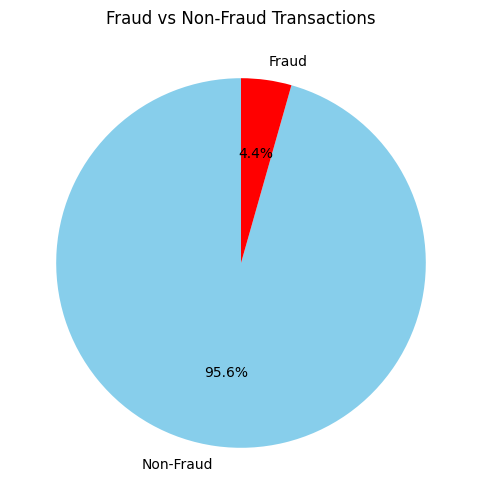

In [24]:
fraud_counts = df["is_fraud"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(fraud_counts, labels=["Non-Fraud", "Fraud"], autopct="%1.1f%%", colors=["skyblue","red"], startangle=90)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


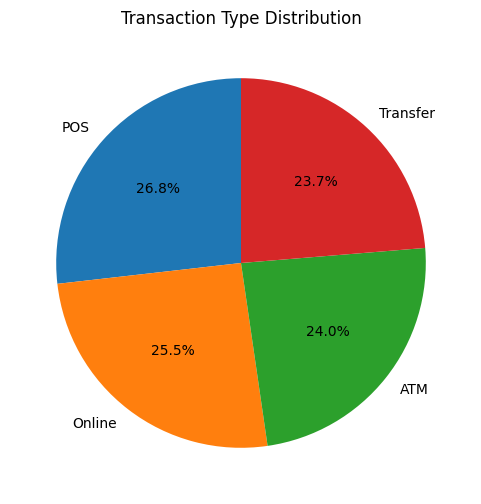

In [25]:
type_counts = df["transaction_type"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Transaction Type Distribution")
plt.show()


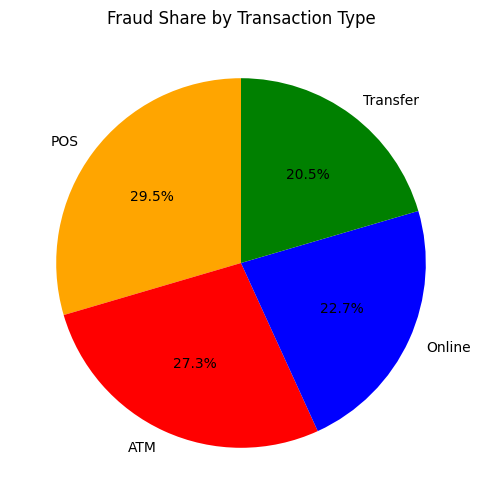

In [26]:
fraud_type = df[df["is_fraud"]==1]["transaction_type"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(fraud_type, labels=fraud_type.index, autopct="%1.1f%%", startangle=90, colors=["orange","red","blue","green"])
plt.title("Fraud Share by Transaction Type")
plt.show()
